## **Importing Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Installing Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Work With Data**

In [64]:
data1 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/dataset.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/Symptom-severity.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/symptom_Description.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Google Colab/disease-symptom-prediction/data/symptom_precaution.csv')

## **Data1 Visualizations**

In [65]:
sns.set(style='whitegrid')
data1.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


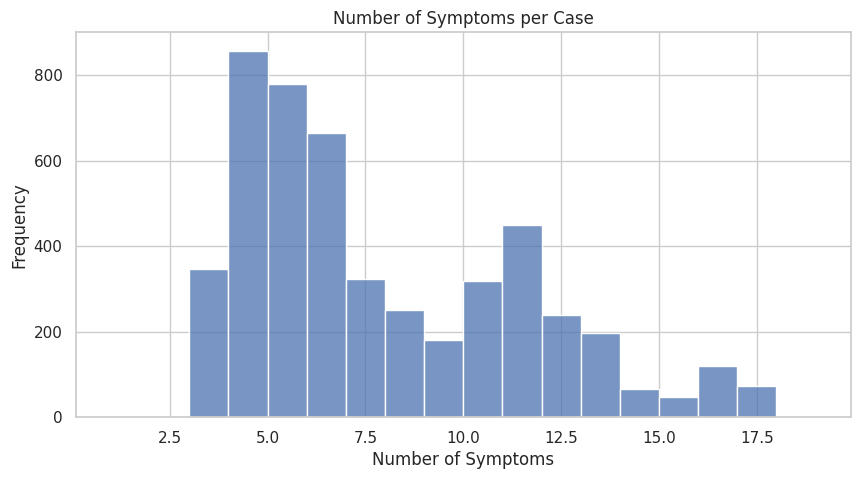

In [66]:
# Insight of this chart is that most patient cases report 4 to 6 symptoms.
symptom_count = data1.drop('Disease', axis=1).notna().sum(axis=1)

plt.figure(figsize=(10,5))
sns.histplot(
    symptom_count,
    bins=range(1, 20),
    kde=False
)
plt.title("Number of Symptoms per Case")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-67-4255109256.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")


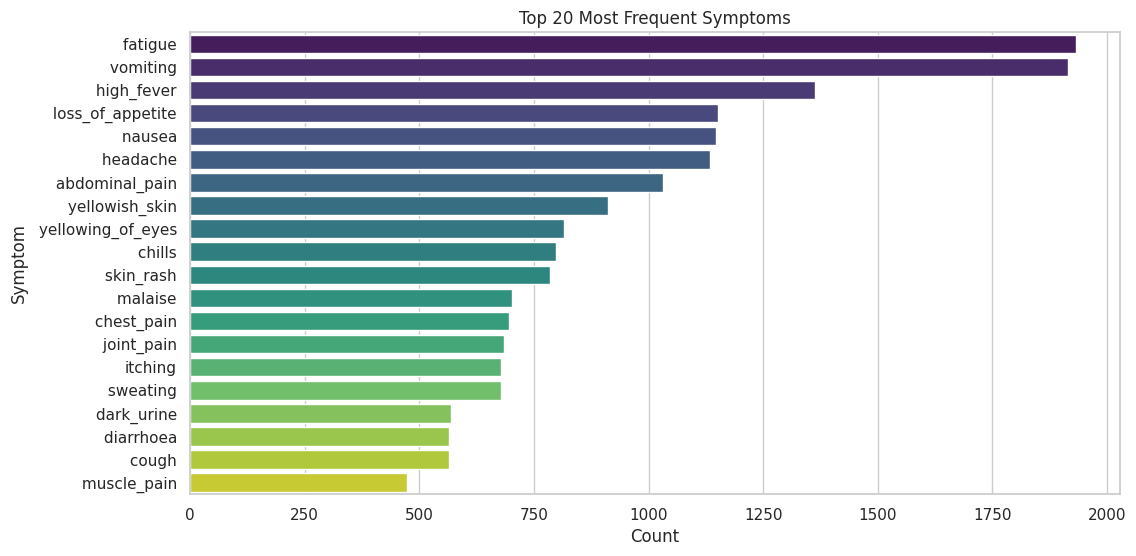

In [67]:
# Flatten all symptom columns into one list
all_symptoms = data1.drop('Disease', axis=1).values.flatten()
symptom_series = pd.Series(all_symptoms)
symptom_counts = symptom_series.value_counts().dropna().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")
plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.show()


## **Data2 Visualizations**

In [48]:
data2.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


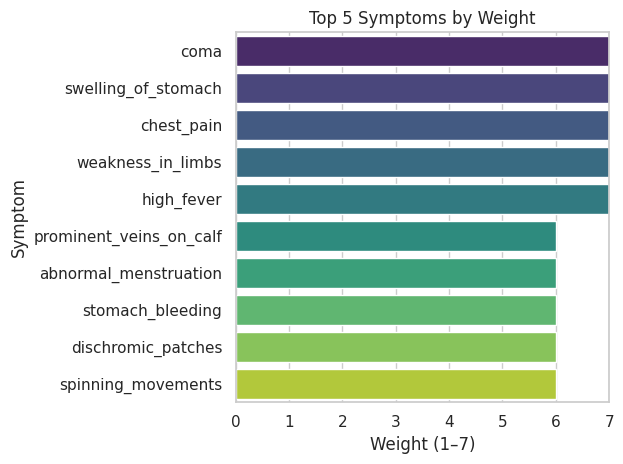

In [49]:
# ascending = False, marks values from highest to lowest
top_symptoms = data2.sort_values(by="weight", ascending=False).head(10)
sns.barplot(data=top_symptoms, x="weight", y='Symptom', palette='viridis')

plt.title("Top 5 Symptoms by Weight")
plt.xlabel("Weight (1–7)")
plt.ylabel("Symptom")
plt.xlim(0, 7)
plt.tight_layout()
plt.show()

# **Data3**

In [50]:
data3.head(5)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


# **Data4**

In [51]:
data4.head(5)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
